# @ Aafaq Altaf Reshi

# The Sparks Foundation-Grip Jan'21 
#  Data Science & Business Analytics

# Importing neccessary imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Iris Dataset (Downloaded from given URL)

In [2]:
df=pd.read_csv('C:/Users/hp/Desktop/Iris2.csv')

# Data Preprocessing

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(df.info())
print("SHAPE",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
SHAPE (150, 6)


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Checking for missing values

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Balancing the dataset

In [7]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# checking for outliers

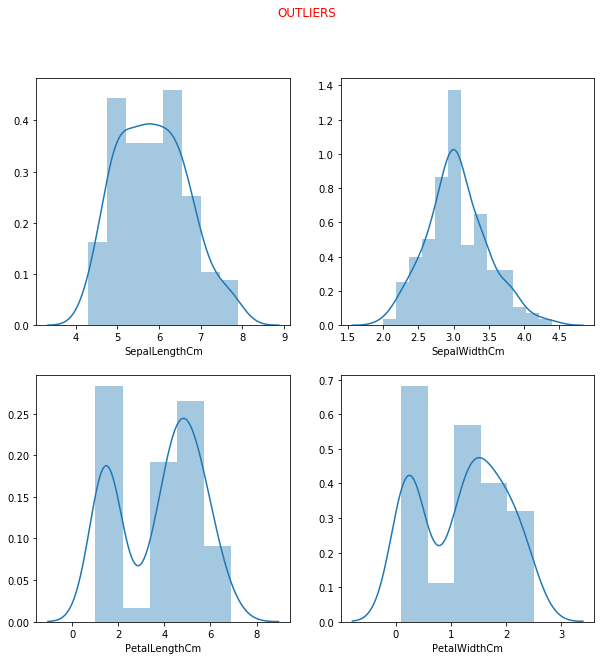

In [8]:
fig,(a1,a2) =plt.subplots(2,2,figsize=(10,10))
fig.suptitle("OUTLIERS",color="red")
sns.distplot(df["SepalLengthCm"],ax=a1[0])
sns.distplot(df["SepalWidthCm"],ax=a1[1])
sns.distplot(df["PetalLengthCm"],ax=a2[0])
sns.distplot(df["PetalWidthCm"],ax=a2[1])

# Plotting pair plots

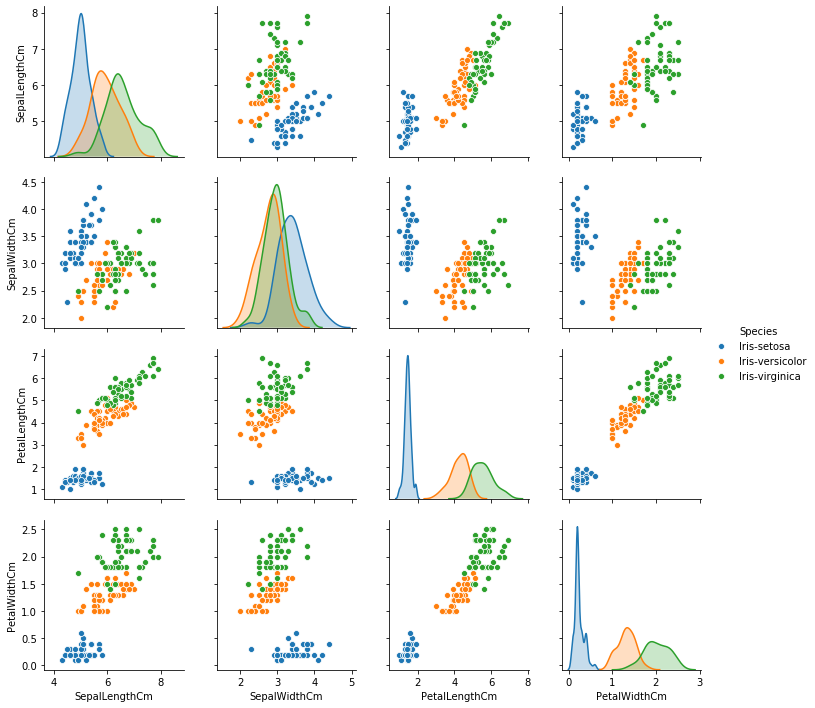

In [9]:
sns.pairplot(df.drop('Id',axis=1),hue='Species')

# Enconding the targets

In [10]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
ready_data=df.drop('Id',axis=1)

In [12]:
ready_data.Species=ready_data.Species.map({"Iris-setosa":1,'Iris-versicolor':2,'Iris-virginica':3})

D:\anacondaaa\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\anacondaaa\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


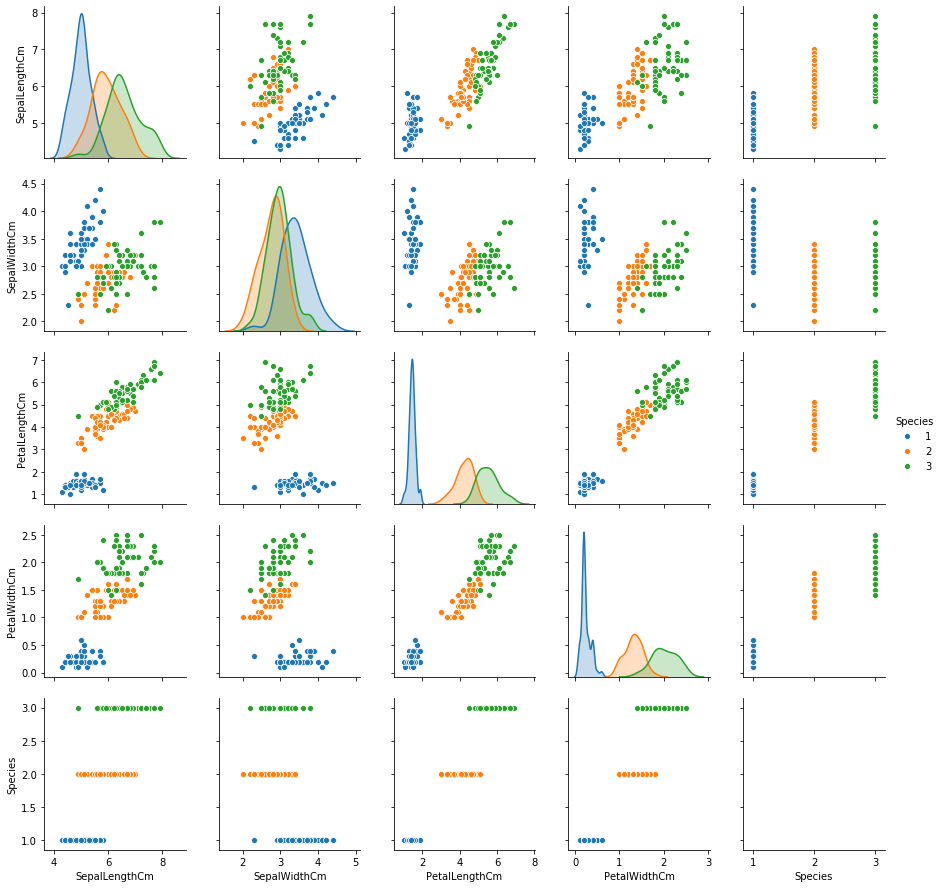

In [13]:
sns.pairplot(ready_data,hue='Species')

# It can be seen from above pairplots that the three species are totally seperable,because of which our accuracy will be very high.

In [14]:
ready_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Feature engineering

In [15]:
features=ready_data.drop('Species',axis=1)
targets=ready_data.Species

# Feature Scaling (we don't need this,but let's do practice)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_fea=scaler.fit_transform(features)

In [17]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest =train_test_split(features,targets,test_size=0.2,random_state=42,shuffle=True) 
#we don't need scaled features

# Building model (don't need hyperparameter tuning,everything will fall into place by own)

In [18]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [19]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
pred =model.predict(xtrain)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
mat =accuracy_score(pred,ytrain)

In [22]:
tpred=model.predict(xtest)

In [23]:
print(confusion_matrix(tpred,ytest))
print(accuracy_score(tpred,ytest))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


# Visualizing Our Model

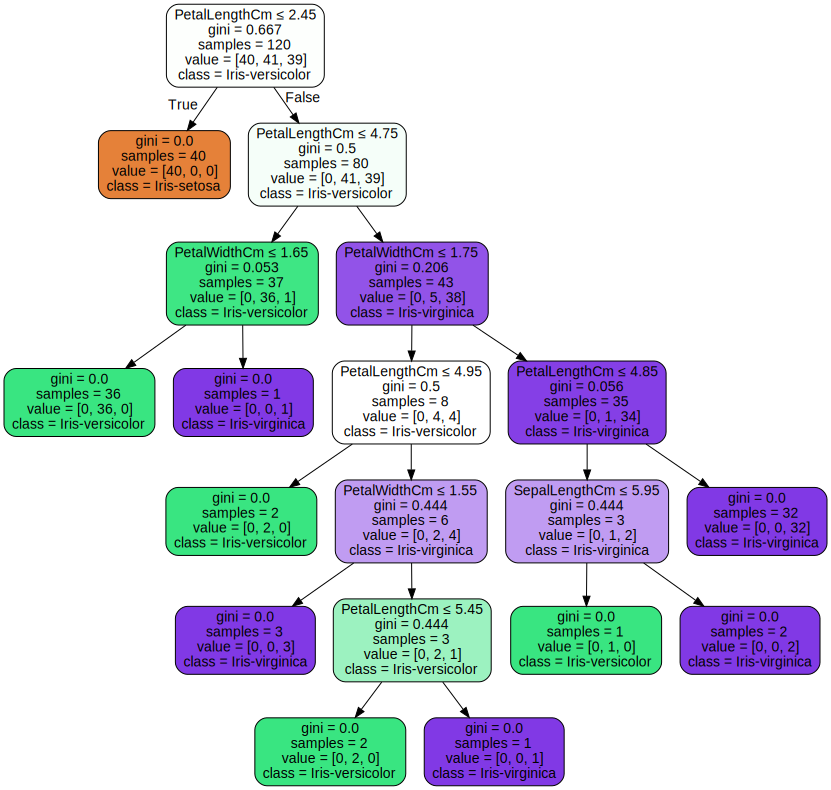

In [53]:
import graphviz
from sklearn import tree
src=tree.export_graphviz(model, out_file=None, feature_names=features.columns.values,  
                    class_names=df.Species.unique(),   filled=True, rounded=True,special_characters=True) 
graphviz.Source(src)

# Lets test our model for all inputs

In [39]:
testpred=model.predict(ready_data.iloc[0:,0:4])

In [40]:
df['encoded_species']=ready_data.Species

In [41]:
df['predicted_encoded']=testpred

In [45]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,encoded_species,predicted_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,1,1
6,7,4.6,3.4,1.4,0.3,Iris-setosa,1,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,1,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,1,1
9,10,4.9,3.1,1.5,0.1,Iris-setosa,1,1
